<a href="https://colab.research.google.com/github/RajarshiRay25/Pneumonia-Classification-with-Deep-Learning-CNN/blob/main/CNN_Pneumonia_Analysis_Lungs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download API Key for Kaggle

---

1. From Kaggle profile get your api key in kaggle.json
2. Download dataset using api key


In [ ]:
from google.colab import files
print("Upload your Kaggle API Key")
files.upload()

Upload your Kaggle API Key


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajarshiray25","key":"7c8ca4820f610ff936d3901bf0a945da"}'}

In [ ]:
%%bash

mkdir -p ~/.kaggle
cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:24<00:00, 76.8MB/s]
100% 2.29G/2.29G [00:24<00:00, 99.0MB/s]


In [ ]:
# Unzip the folder

import zipfile
file_zip = zipfile.ZipFile('/content/chest-xray-pneumonia.zip','r')
file_zip.extractall('/content')
file_zip.close()

## DATASET PARAMETERS + TRAINING SET

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
# Constant parameters

IMAGE_SIZE = 256
BATCH_SIZE = 32
RGB_CHANNEL = 3

In [ ]:
# Preparing training dataset

dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/chest_xray/chest_xray/train", # Parent directory name
    seed = 100,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    labels="inferred"
)

Found 5216 files belonging to 2 classes.


In [ ]:
# Class names of training data

CLASS_NAME_TRAIN = dataset_train.class_names
CLASS_NAME_TRAIN

['NORMAL', 'PNEUMONIA']

In [ ]:
# Number of batches

len(dataset_train)

163

In [ ]:
# Exploring the images and label data : Taking 1 batch

for image_batch,label_batch in dataset_train.take(1):
  print(image_batch[0].numpy())  # Numpy array for first image
  print(image_batch.shape)
  print(label_batch.numpy()) # Label array

[[[ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  ...
  [53.15645  53.15645  53.15645 ]
  [59.224762 59.224762 59.224762]
  [59.428986 59.428986 59.428986]]

 [[ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  ...
  [56.499405 56.499405 56.499405]
  [55.61989  55.61989  55.61989 ]
  [58.71875  58.71875  58.71875 ]]

 [[ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  ...
  [48.28807  48.28807  48.28807 ]
  [57.539658 57.539658 57.539658]
  [53.433792 53.433792 53.433792]]

 ...

 [[ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  ...
  [ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  [ 0.        0.        0.      ]]

 [[ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  ...
  [ 0.        0.        0.      ]
  [ 

## Visualise the images

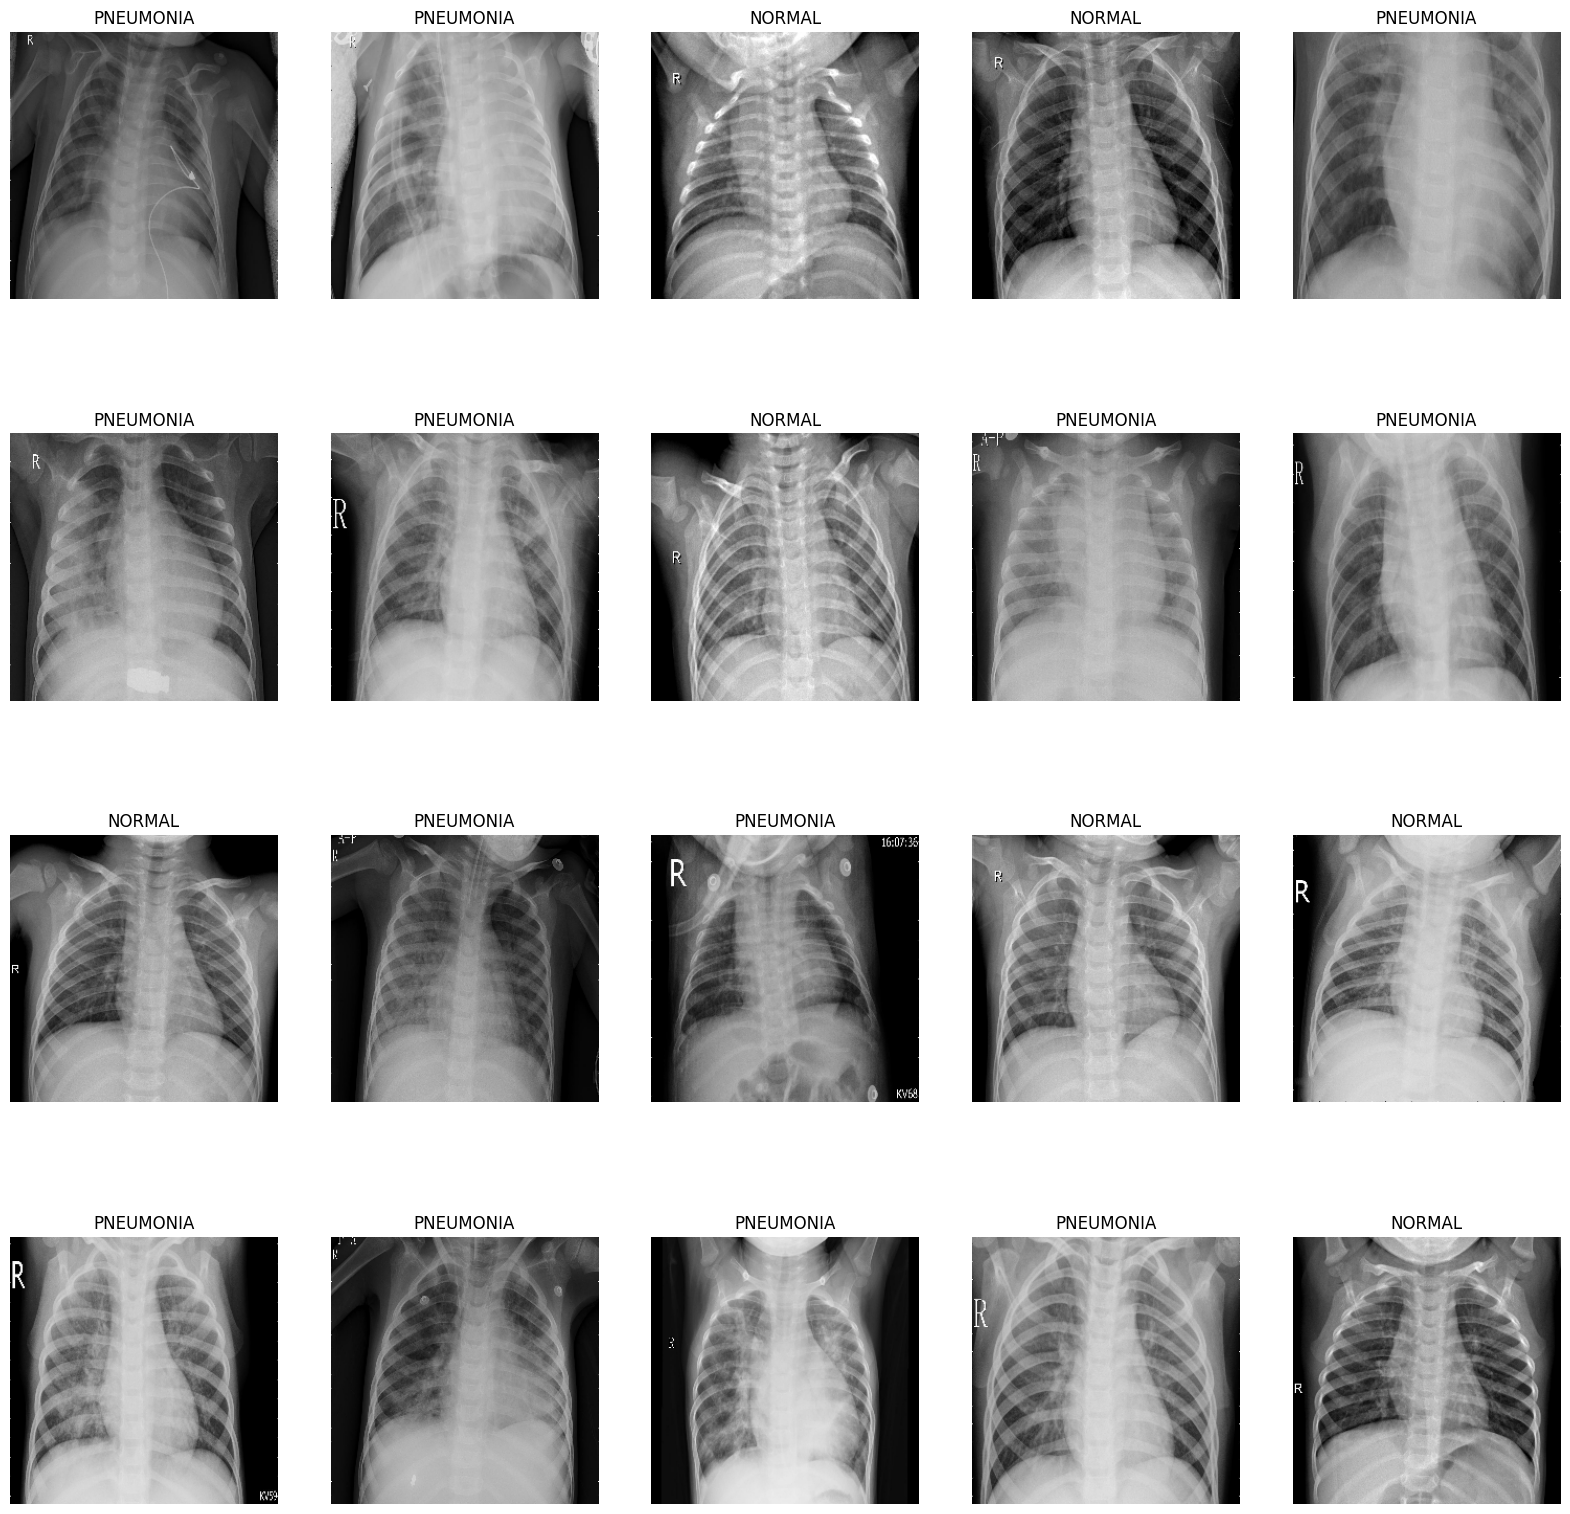

In [ ]:
plt.figure(figsize=(20,20))

for image_batch,label_batch in dataset_train.take(1):  # Take 1 batch
  for i in range(20):  # Access 20 images
    ax = plt.subplot(4,5,i+1)  # 4 rows 5 columns i+1 for each images as i initiates as 0
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(CLASS_NAME_TRAIN[label_batch[i]])
    plt.axis('off')

## Preparing Validation Dataset

In [ ]:
# Preparing validation dataset

dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/chest_xray/chest_xray/val", # Parent directory name
    seed = 100,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    labels="inferred"
)

Found 16 files belonging to 2 classes.


In [ ]:
len(dataset_validation)

1

In [ ]:
CLASS_NAME_VAL = dataset_validation.class_names
CLASS_NAME_VAL

['NORMAL', 'PNEUMONIA']

In [ ]:
for image_batch,label_batch in dataset_validation.take(1):
  print(image_batch[0].numpy())
  print(image_batch.shape)
  print(label_batch.numpy())

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
(16, 256, 256, 3)
[1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0]


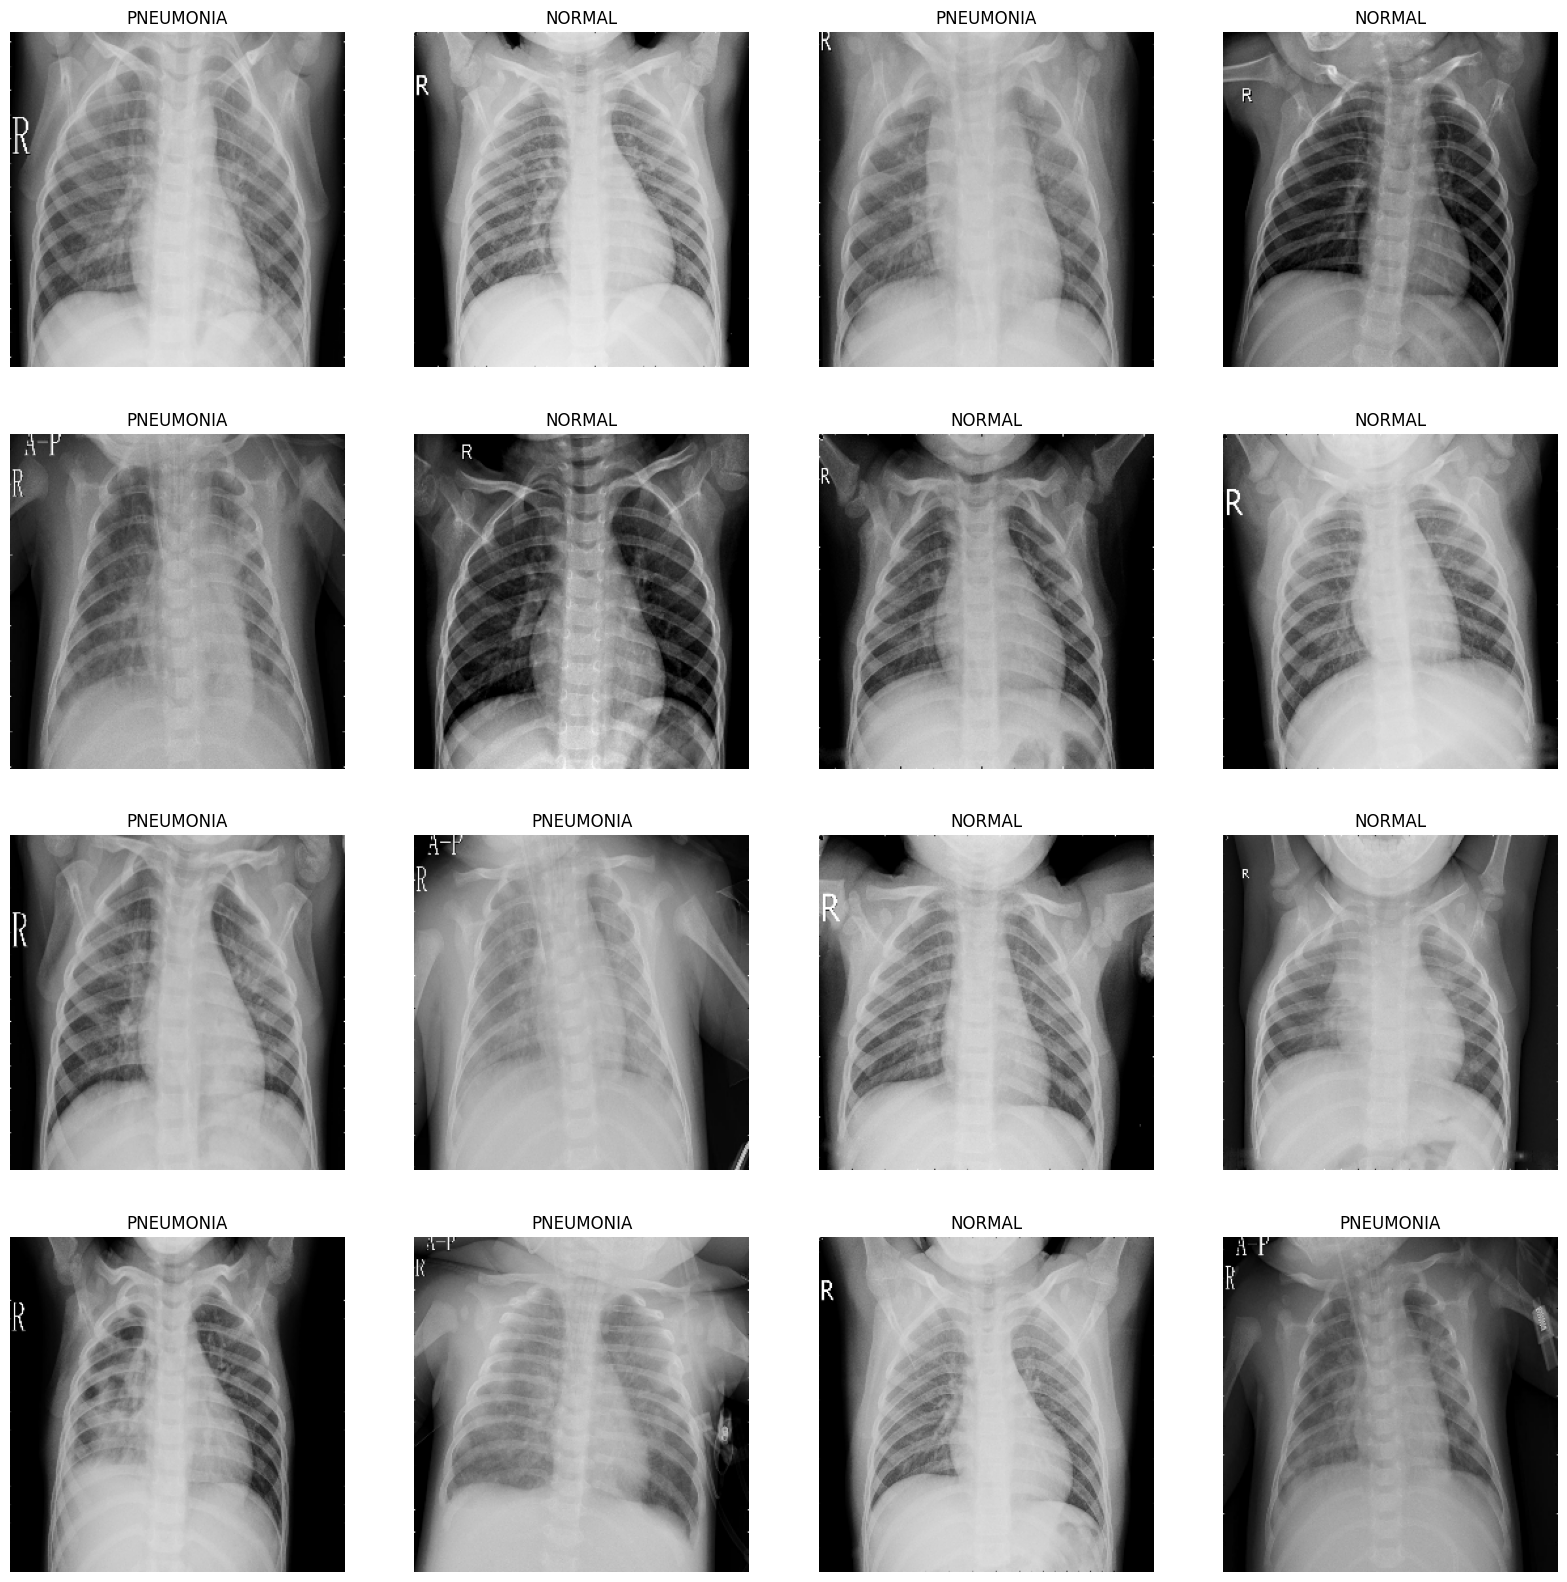

In [ ]:
plt.figure(figsize=(20,20))
for image_batch,label_batch in dataset_validation.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(CLASS_NAME_VAL[label_batch[i]])
    plt.axis('off')

## Preparing Test Dataset

In [ ]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/chest_xray/chest_xray/test", # Parent directory name
    seed = 100,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    labels="inferred"
)

Found 624 files belonging to 2 classes.


In [ ]:
len(dataset_test)

20

In [ ]:
CLASS_NAME_TEST = dataset_test.class_names
CLASS_NAME_TEST

['NORMAL', 'PNEUMONIA']

In [ ]:
for image_batch,label_batch in dataset_test.take(1):
  print(image_batch[0].numpy())
  print(image_batch.shape)
  print(label_batch.numpy())

[[[57.65625   57.65625   57.65625  ]
  [60.984375  60.984375  60.984375 ]
  [66.359375  66.359375  66.359375 ]
  ...
  [15.        15.        15.       ]
  [15.        15.        15.       ]
  [15.        15.        15.       ]]

 [[59.717773  59.717773  59.717773 ]
  [63.171875  63.171875  63.171875 ]
  [67.828125  67.828125  67.828125 ]
  ...
  [14.        14.        14.       ]
  [14.        14.        14.       ]
  [14.        14.        14.       ]]

 [[61.194336  61.194336  61.194336 ]
  [64.625     64.625     64.625    ]
  [68.18457   68.18457   68.18457  ]
  ...
  [13.3125    13.3125    13.3125   ]
  [13.3125    13.3125    13.3125   ]
  [13.3125    13.3125    13.3125   ]]

 ...

 [[ 5.477539   5.477539   5.477539 ]
  [ 3.0927734  3.0927734  3.0927734]
  [21.949219  21.949219  21.949219 ]
  ...
  [20.        20.        20.       ]
  [20.692383  20.692383  20.692383 ]
  [21.        21.        21.       ]]

 [[ 6.         6.         6.       ]
  [ 4.015625   4.015625   4.015625 ]


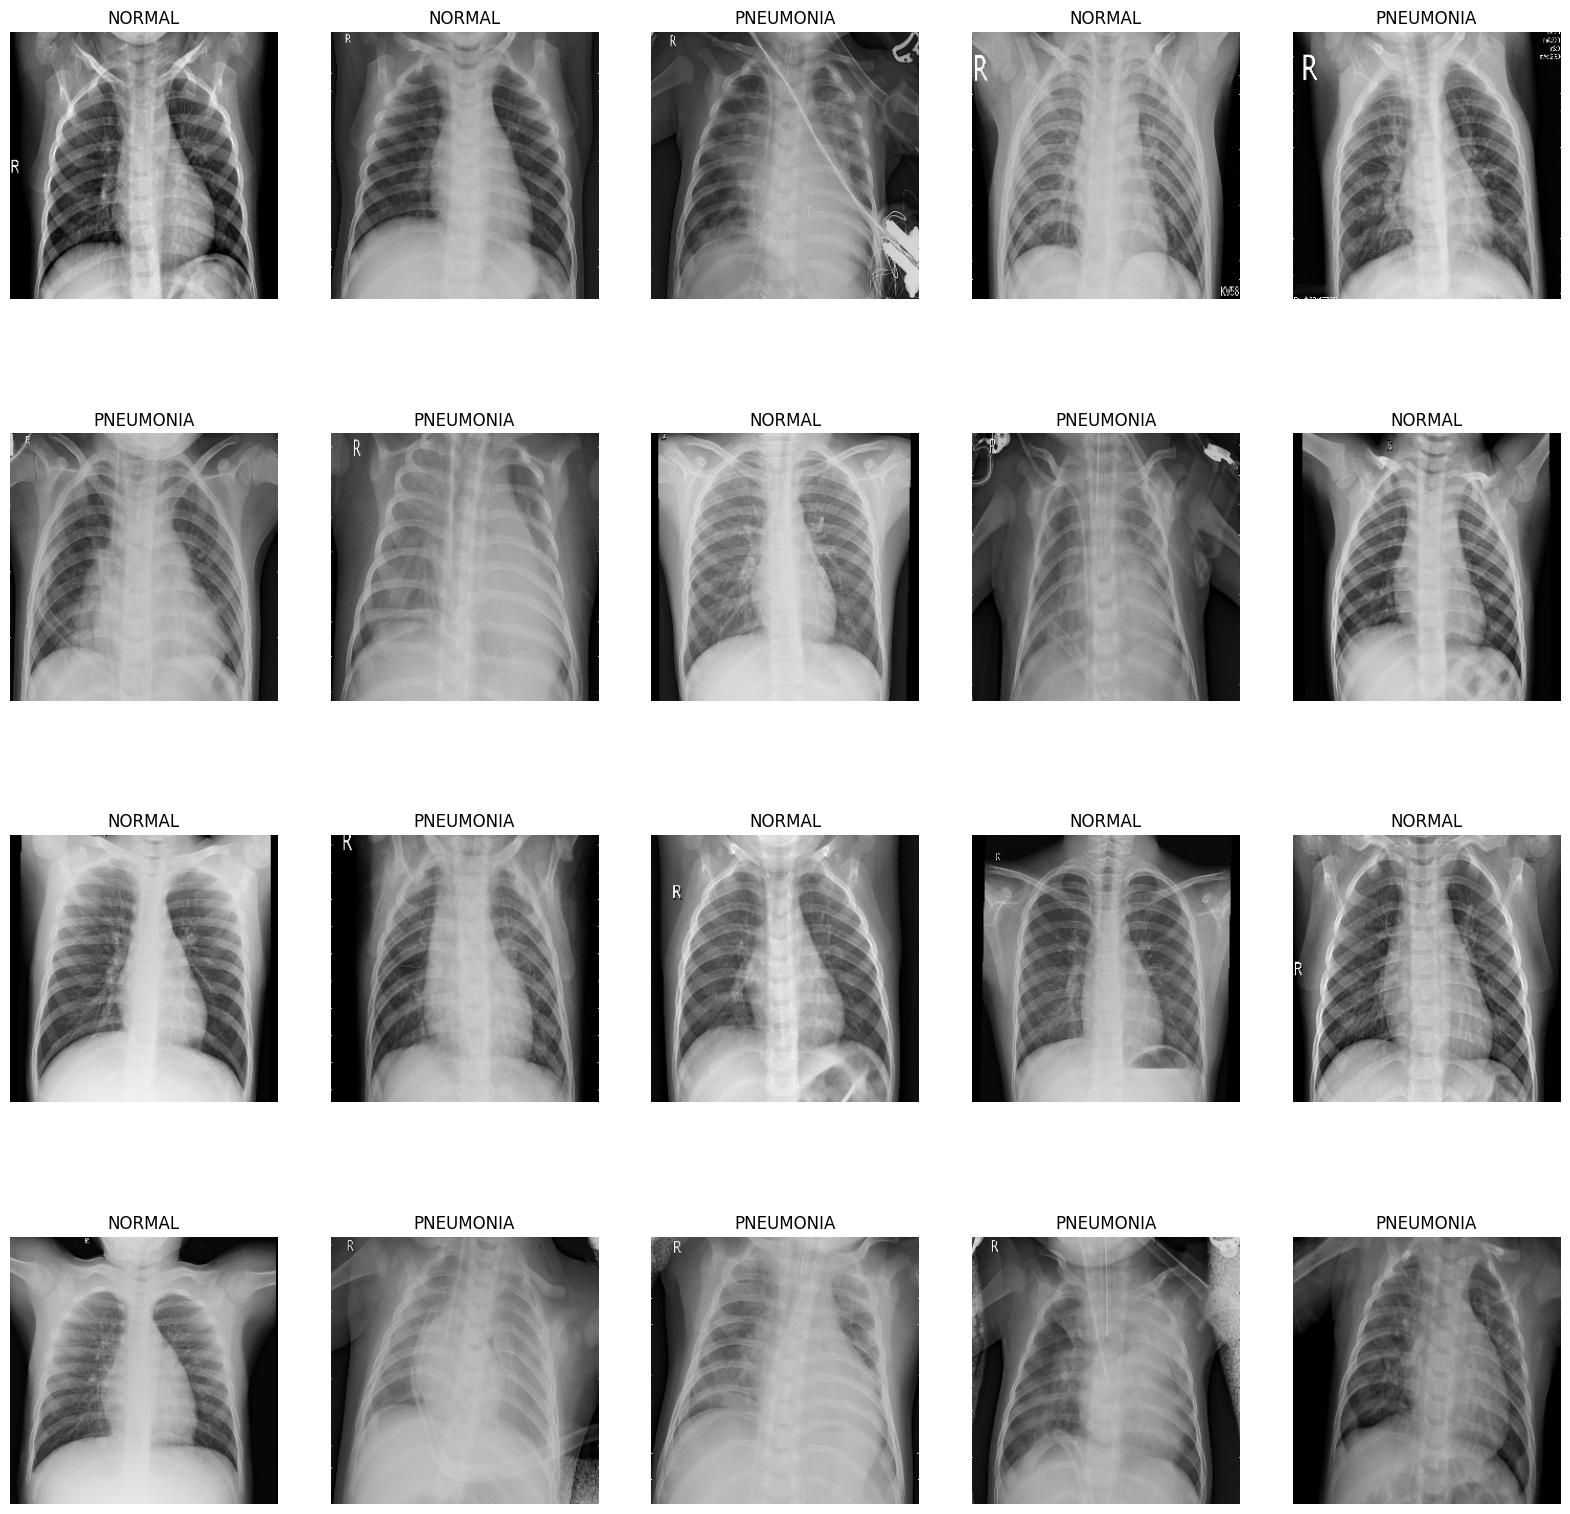

In [ ]:
plt.figure(figsize=(20,20))

for image_batch,label_batch in dataset_test.take(1):
  for i in range(20):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(CLASS_NAME_TEST[label_batch[i]])
    plt.axis('off')

In [ ]:
# Finalising the train test and val dataset

print(f"Training Part has {len(dataset_train)} batches")
print(f"Testing Part has {len(dataset_test)} batches")
print(f"Validation Part has {len(dataset_validation)} batches")

Training Part has 163 batches
Testing Part has 20 batches
Validation Part has 1 batches


## Performing prefetch and cache operation on dataset to utilise memory efficiently during runtime processing

---

1. Cache: Caching is a technique used to improve data pipeline performance by storing a portion of the dataset in memory.
When you apply caching to a dataset, it saves a portion of the data in memory (RAM) to avoid re-reading the same data from disk in subsequent iterations.
Caching can be particularly useful when you have a relatively small dataset or when reading data from a slow storage medium like a network drive or external storage.

2. Prefetch: Prefetching is another technique to improve data pipeline efficiency by overlapping data preprocessing and model training.
When you prefetch a dataset, it creates a buffer where data is loaded and preprocessed in parallel with the model's training. This way, the CPU and GPU workloads can be more efficiently balanced.
A common value for prefetch is to set it to a small positive integer, indicating the number of elements to prefetch.

3. Shuffle: Shuffling a dataset means that you randomly reorder the elements within the dataset. This is useful during training to introduce randomness into the data and prevent the model from learning the order of the examples.
Shuffling is particularly important when you train a neural network using stochastic gradient descent (SGD) because it helps the model escape local minima and learn better.
The shuffle operation in TensorFlow is often used with a parameter specifying the buffer size, which determines how many elements are loaded into a buffer and randomly sampled for the next batch.

In [ ]:
training_data = dataset_train.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)
testing_data = dataset_test.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_data = dataset_validation.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)

## Model Building
---
Image resizing and rescaling to maintain high accuracy and constant behavior.Augmentation of images to create various positional variants of images which will increase the dataset size. Applying these properties we will be connecting them to Convolutional layers and then extract features through filters and max pooling and then the finalised processed data to fully connected neural layers which flattens the data and pass through activation and dense layers to categorise it.

In [ ]:
# Image resizing and rescale layer

image_resize_rescale_layer = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:
# Image augmentation layer to create variants

image_augmentation_layer = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

### Neural Network model
---
1. Declare the input shape in format (images in a batch,width_pixel,height_pixel,color_channel)
2. Declare the categories
3. Sequential model :

      *   Rescale and resize layer
      *   Augmentation layer
      *   Convolutional layers : Feature extractions and preparation
      *   Fully connected layers : Classification layers



In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,RGB_CHANNEL)
num_categories = 2

In [ ]:
# Create the model

model = models.Sequential([
    # Convolutional layers - image processing

    image_resize_rescale_layer,
    image_augmentation_layer,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Fully connected layers

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_categories,activation='sigmoid')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
# Compiling the model with optimiser , loss and metrics

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Fitting the model

history = model.fit(
    training_data,
    batch_size=BATCH_SIZE,
    validation_data=validation_data,
    verbose=1,
    epochs=50,
)

Epoch 1/50
163/163 [==============================] - 56s 64ms/step - loss: 0.4926 - accuracy: 0.7855 - val_loss: 1.4259 - val_accuracy: 0.5625
Epoch 2/50
163/163 [==============================] - 10s 61ms/step - loss: 0.2634 - accuracy: 0.8978 - val_loss: 0.9076 - val_accuracy: 0.5625
Epoch 3/50
163/163 [==============================] - 10s 59ms/step - loss: 0.2081 - accuracy: 0.9185 - val_loss: 0.6628 - val_accuracy: 0.5625
Epoch 4/50
163/163 [==============================] - 10s 59ms/step - loss: 0.1963 - accuracy: 0.9254 - val_loss: 0.7195 - val_accuracy: 0.6250
Epoch 5/50
163/163 [==============================] - 10s 59ms/step - loss: 0.1811 - accuracy: 0.9316 - val_loss: 0.6971 - val_accuracy: 0.5625
Epoch 6/50
163/163 [==============================] - 9s 58ms/step - loss: 0.1786 - accuracy: 0.9270 - val_loss: 0.9144 - val_accuracy: 0.5625
Epoch 7/50
163/163 [==============================] - 10s 58ms/step - loss: 0.1838 - accuracy: 0.9279 - val_loss: 0.5686 - val_accuracy: 

In [ ]:
# Evaluating test data

test_data_evaluation = model.evaluate(testing_data)
test_data_evaluation

20/20 [==============================] - 4s 25ms/step - loss: 0.3793 - accuracy: 0.8574


[0.37929967045783997, 0.8573718070983887]

## Visualising Training and Validation

#### Improvement : we need to take validation from training set as the given validation has few data

In [ ]:
# Variables for graph
EPOCHS = 50
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

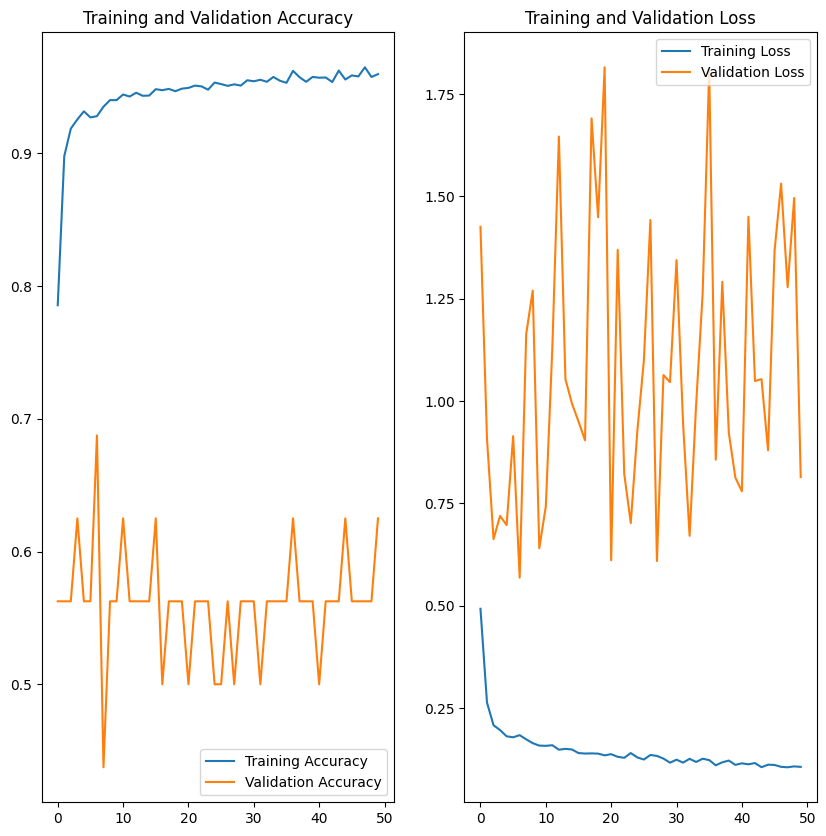

In [ ]:
# Graph

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),accuracy,label='Training Accuracy')
plt.plot(range(EPOCHS),validation_accuracy,label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),validation_loss,label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

##Prediction system

1/1 [==============================] - 0s 29ms/step


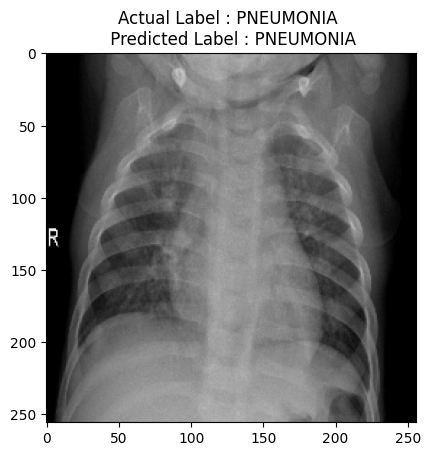

In [ ]:
import numpy as np

for image_batch,label_batch in dataset_test.take(1):
  image_select = image_batch[0].numpy().astype('uint8')
  label_given = label_batch[0].numpy()

  plt.imshow(image_select)
  ACTUAL_LABEL = CLASS_NAME_TEST[label_given]
  prediction_label = model.predict(image_batch)

  PREDICTED_LABEL = CLASS_NAME_TEST[np.argmax(prediction_label[0])]
  plt.title(f"Actual Label : {ACTUAL_LABEL} \n Predicted Label : {PREDICTED_LABEL}")

1/1 [==============================] - 0s 29ms/step


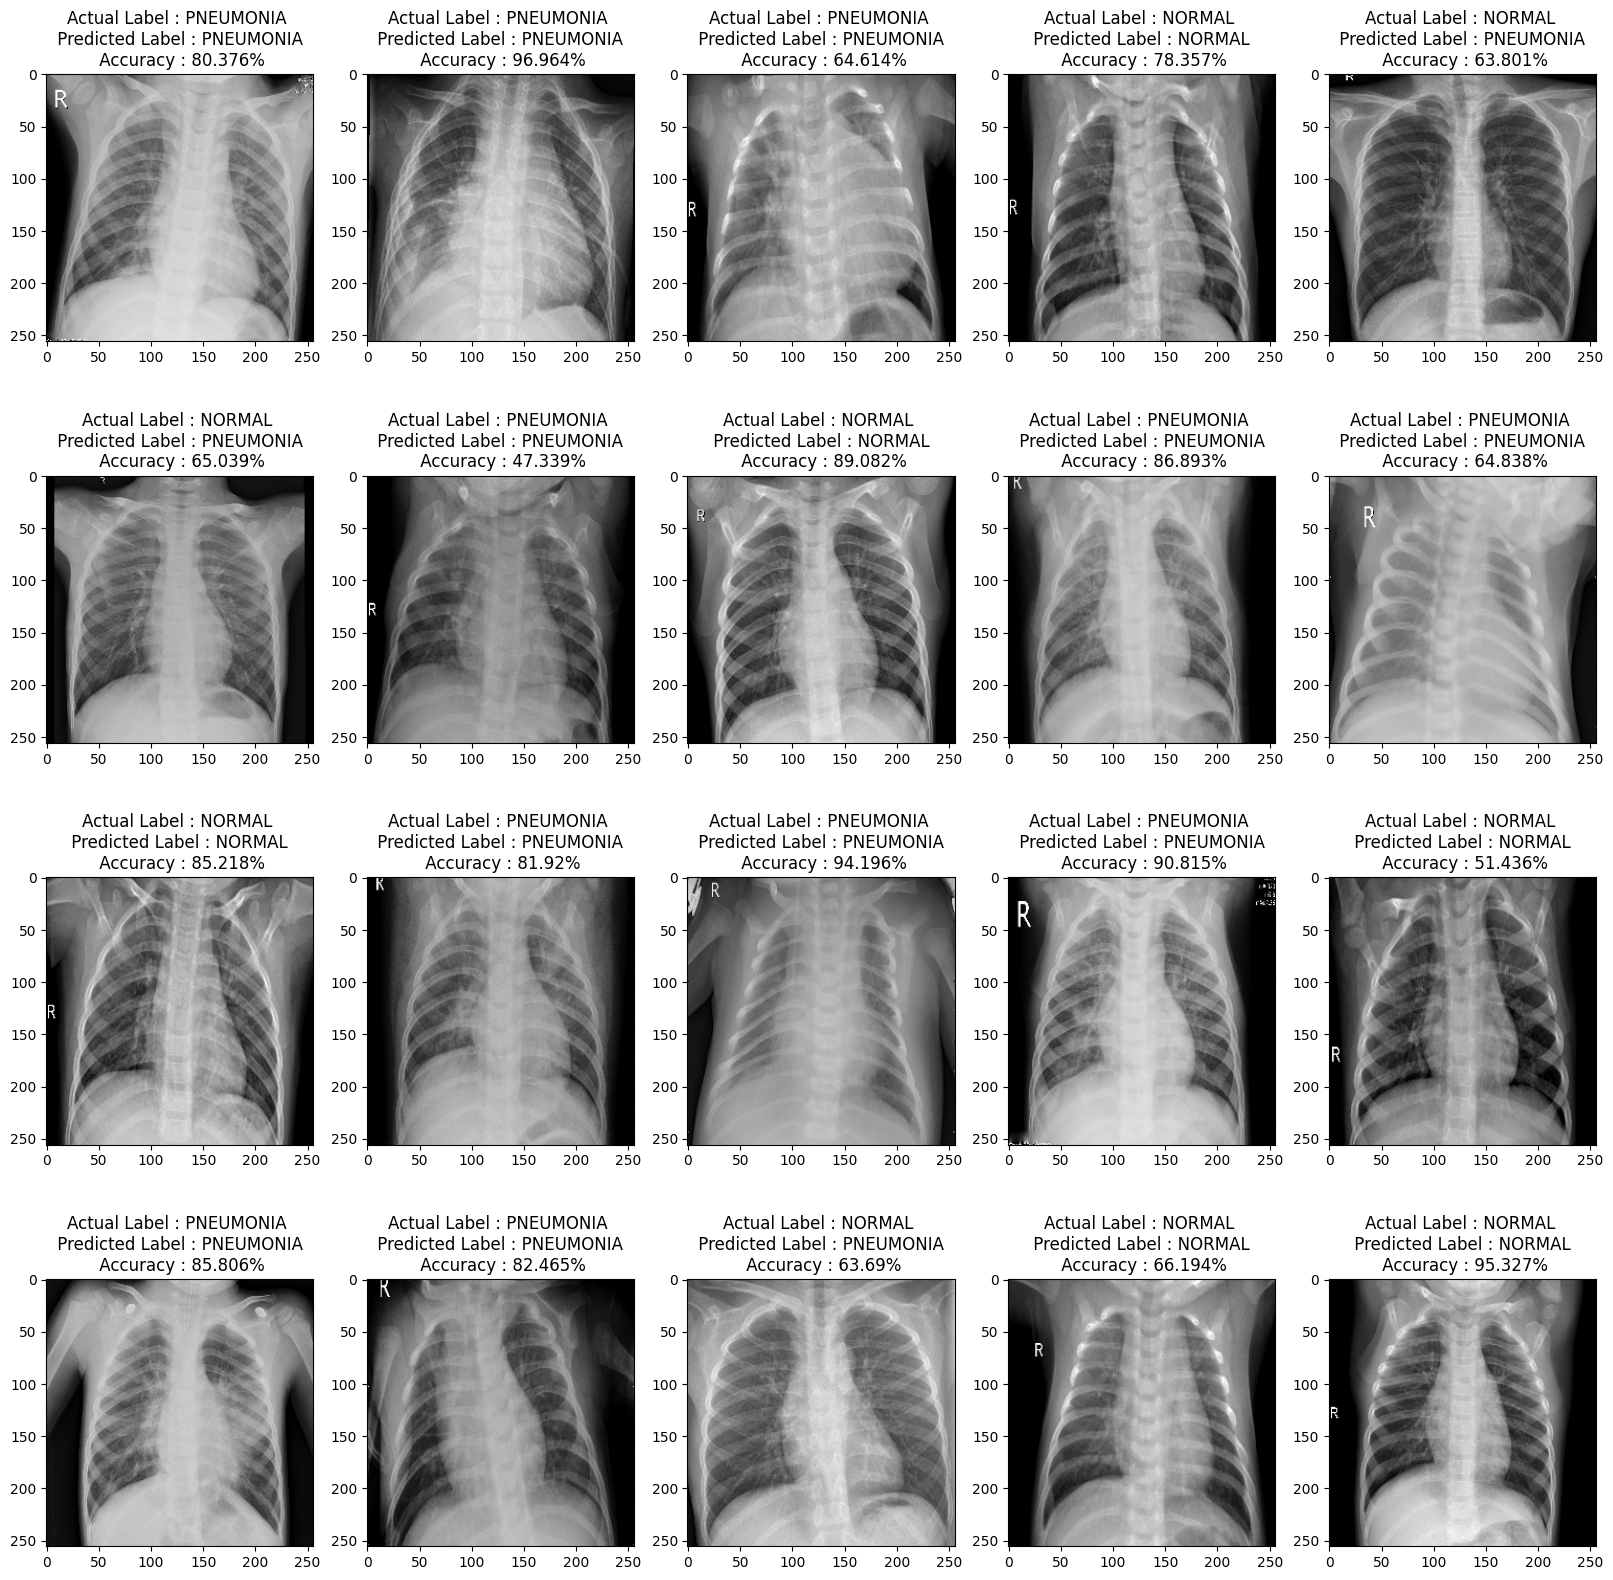

In [ ]:
plt.figure(figsize=(20,20))

for image_batch,label_batch in dataset_test.take(1):
  for i in range(20):
    image_select = image_batch[i].numpy().astype('uint8')
    label_select = label_batch[i].numpy()

    ax = plt.subplot(4,5,i+1)
    plt.imshow(image_select)

    ACTUAL_LABEL = CLASS_NAME_TEST[label_select]  # from classname get the name as per index
    label_prediction = model.predict(image_batch)  # get the label prediction

    PREDICTED_LABEL = CLASS_NAME_TEST[np.argmax(label_prediction[i])]  # predictions come in probability values so from the max probability get its index
    ACCURACY_SCORE = round(100 * (np.max(label_prediction[i])),3)
    plt.title(f"Actual Label : {ACTUAL_LABEL} \n Predicted Label : {PREDICTED_LABEL} \n Accuracy : {ACCURACY_SCORE}%")
